In [3]:
import crested
from helper_functions import *

2025-08-05 14:18:49.744218: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-05 14:18:49.756642: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754428729.770789   37459 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754428729.775032   37459 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-05 14:18:49.789434: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [4]:
# load a trained model
import keras

model_path = "/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/OCTO/aibs-octo-dnaseq-modeling/basal-ganglia/models/crested/astrocytes/astro/astro_human/full_universe_base_subset_filtered_ft_2_dars_ft///checkpoints/05.keras"
model = keras.models.load_model(model_path, compile=False)  

model_dv_p = "/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/OCTO/aibs-octo-dnaseq-modeling/basal-ganglia/models/crested/astrocytes/astro/astro_human/cluster_full_universe_base_subset_filtered_dars/checkpoints/30.keras"
model_dv = keras.models.load_model(model_dv_p, compile=False)  


I0000 00:00:1754428745.533315   37459 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38480 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:ca:00.0, compute capability: 8.0


In [5]:
import anndata as ad
adata= ad.read_h5ad("/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/OCTO/aibs-octo-dnaseq-modeling/basal-ganglia/models/crested/astrocytes/astro/astro_dars.h5ad")


In [6]:
import pysam
genome_macaque  = "/allen/programs/celltypes/workgroups/rnaseqanalysis/references/macaque/ncbi/mmul10/genome/fasta/genome.fa"
genome_mouse  = "/allen/programs/celltypes/workgroups/rnaseqanalysis/references/mouse/10x/mm10/genome/fasta/genome.fa"
genome_human = "/allen/programs/celltypes/workgroups/rnaseqanalysis/references/human/10x/grch38.p2/genome/fasta/genome.fa"

In [7]:
macaque_chrom_map = load_macaque_chrom_map("/home/niklas.kempynck/nkemp/spc_crested/mac_chrom.txt")

In [8]:
import os

genome_fasta  = "/allen/programs/celltypes/workgroups/rnaseqanalysis/references/human/10x/grch38.p2/genome/fasta/genome.fa"
# if you ever need a .chrom.sizes (for change_regions_width etc)
chr_sizes     = os.path.abspath(
    os.path.join(os.path.dirname(genome_fasta), "../star/chrNameLength.txt")
)
genome = crested.Genome(
   genome_fasta, chr_sizes)

crested.register_genome(
    genome
)  # Register the genome so that it can be used by the package

2025-08-05T14:19:06.864191-0700 INFO Genome genome registered.


# Load regions

In [9]:
import pandas as pd
df = pd.read_csv('astro_enhancers.csv', index_col='Plasmid ID')
df

,Project name,Cell type target class (SpC),Cell type target subclass/group (SpC),Species,Coordinates,Core,Level of labeling,Category,Note,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
Plasmid ID,,,,,,,,,,,,,,,,,,
eHGT_381h,From Yuanyuan,Astro,GM exSTR,Human,chr7:131400918-131401149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eHGT_385h,From Yuanyuan,Astro,GM STR,Human,chr9:123741938-123742543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eHGT_376h,From Yuanyuan,Astro,all,Human,chr3:188076136-188076690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eHGT_380h,From Yuanyuan,Astro,all,Human,chr6:44045566-44046145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eHGT_390h,From Yuanyuan,Astro,all,Human,chr7:42152720-42153410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MGT_E160m,From Yuanyuan,Astro,GM exSTR,Mouse,chr17:88297369-88297914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MGT_E122m,From Yuanyuan,Astro,GM STR,Mouse,chr8:54791804-54792949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MGT_E120m,From Yuanyuan,Astro,?,Mouse,chr1:127159651-127161393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AiE1211q,From Morgan,Astro,NaN,Macaque,chr1:164441310-164441810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
import pysam
from tqdm import tqdm

species_to_genome = {
    "Macaque": pysam.FastaFile(genome_macaque),
    "Mouse": pysam.FastaFile(genome_mouse),
    "Human": pysam.FastaFile(genome_human),
}

df = assign_sequences(
    df,
    species_to_genome=species_to_genome,
    target_length=2114,
    macaque_chrom_map=macaque_chrom_map
)
df['Level of labeling']=1


[DEBUG][eHGT_381h] Original coords = chr7:131400918-131401149
[DEBUG][eHGT_381h] Raw length = 231
[DEBUG][eHGT_381h] Original padded = 2114 (L=941, R=942)
[DEBUG][eHGT_381h] core='nan' → no bashing
[DEBUG][eHGT_385h] Original coords = chr9:123741938-123742543
[DEBUG][eHGT_385h] Raw length = 605
[DEBUG][eHGT_385h] Original padded = 2114 (L=754, R=755)
[DEBUG][eHGT_385h] core='nan' → no bashing
[DEBUG][eHGT_376h] Original coords = chr3:188076136-188076690
[DEBUG][eHGT_376h] Raw length = 554
[DEBUG][eHGT_376h] Original padded = 2114 (L=780, R=780)
[DEBUG][eHGT_376h] core='nan' → no bashing
[DEBUG][eHGT_380h] Original coords = chr6:44045566-44046145
[DEBUG][eHGT_380h] Raw length = 579
[DEBUG][eHGT_380h] Original padded = 2114 (L=767, R=768)
[DEBUG][eHGT_380h] core='nan' → no bashing
[DEBUG][eHGT_390h] Original coords = chr7:42152720-42153410
[DEBUG][eHGT_390h] Raw length = 690
[DEBUG][eHGT_390h] Original padded = 2114 (L=712, R=712)
[DEBUG][eHGT_390h] core='nan' → no bashing
[DEBUG][MGT_E1

I0000 00:00:1754428747.215512   37674 service.cc:148] XLA service 0x7f7a5000d080 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754428747.215536   37674 service.cc:156]   StreamExecutor device (0): NVIDIA A100-PCIE-40GB, Compute Capability 8.0
2025-08-05 14:19:07.235411: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1754428747.302353   37674 cuda_dnn.cc:529] Loaded cuDNN version 90600
2025-08-05 14:19:07.944396: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_369', 4 bytes spill stores, 4 bytes spill loads

2025-08-05 14:19:12.409054: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 136.11GiB with freed_by_count=0. The caller indicates t

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


I0000 00:00:1754428757.293466   37674 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Niklas/software/HMBA_Genomics/BasalGanglia_Astro/snATAC/DNAseqModel/helper_functions.py:306: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


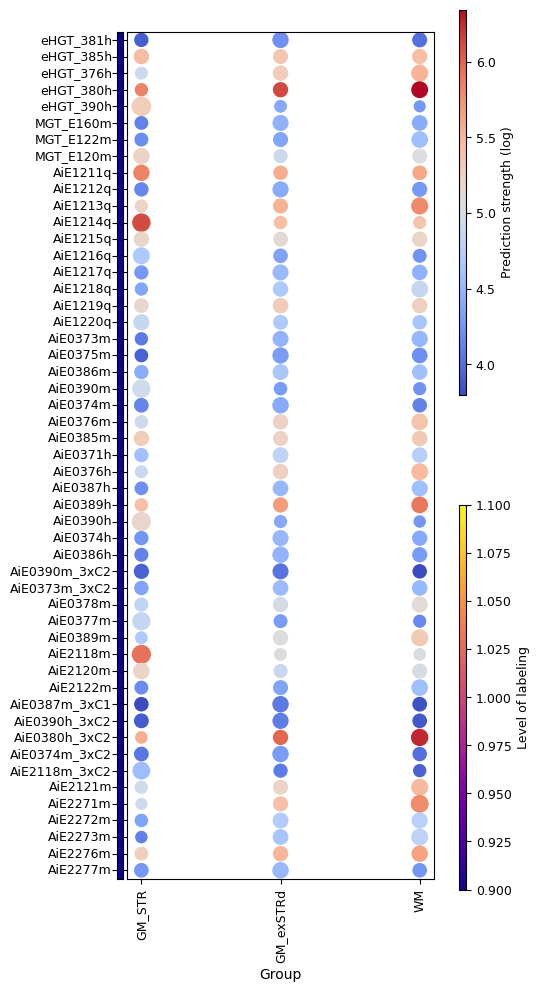

In [11]:
%matplotlib inline
prediction_specificity = crested.pp._utils._calc_proportion(crested.tl.predict(df["Sequence"].tolist(), model))
prediction_strength = np.log1p(crested.tl.predict(df["Sequence"].tolist(), model))

plot_prediction_scatter_grid(prediction_strength, prediction_specificity, df, list(adata.obs_names), figsize=(5,11), cmap='coolwarm')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 942ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Niklas/software/HMBA_Genomics/BasalGanglia_Astro/snATAC/DNAseqModel/helper_functions.py:306: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


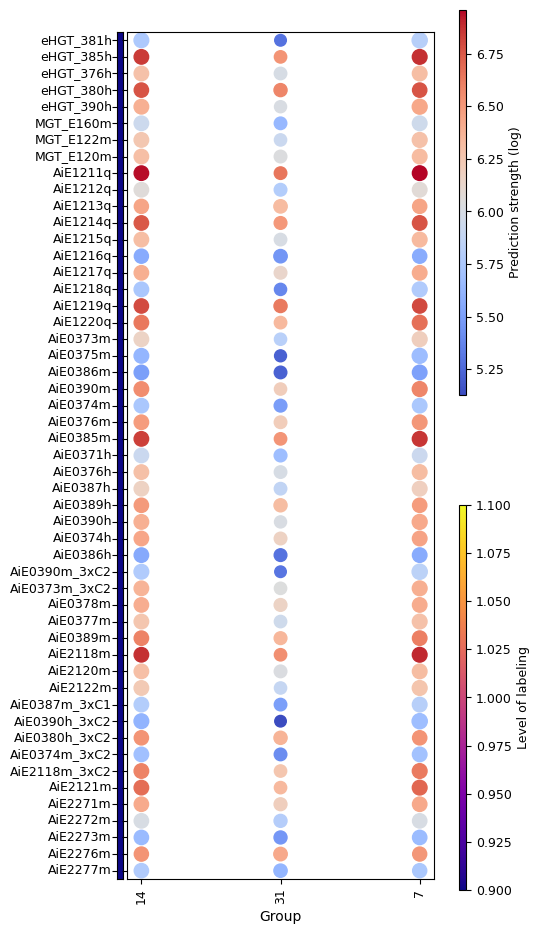

In [12]:
%matplotlib inline
prediction_specificity = crested.pp._utils._calc_proportion(crested.tl.predict(df["Sequence"].tolist(), model_dv))
prediction_strength = np.log1p(crested.tl.predict(df["Sequence"].tolist(), model_dv))

plot_prediction_scatter_grid(prediction_strength, prediction_specificity, df,['14', '31', '7'], figsize=(5,11), cmap='coolwarm')

In [13]:
model_path, output_names_biccn = crested.get_model("DeepBICCN2")
model_biccn = keras.models.load_model(model_path, compile=False)
model_path, output_names_wmb = crested.get_model("DeepMouseBrain3")
model_wmb = keras.models.load_model(model_path, compile=False)

2025-08-05 14:19:21.514288: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_369', 196 bytes spill stores, 184 bytes spill loads

2025-08-05 14:19:21.807554: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_369', 8 bytes spill stores, 8 bytes spill loads

2025-08-05 14:19:22.161945: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_369', 220 bytes spill stores, 220 bytes spill loads

2025-08-05 14:19:25.105665: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 162.53GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more me

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

2025-08-05 14:19:28.850422: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_369', 196 bytes spill stores, 184 bytes spill loads

2025-08-05 14:19:28.904467: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_369', 8 bytes spill stores, 8 bytes spill loads

2025-08-05 14:19:29.439606: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_369', 156 bytes spill stores, 156 bytes spill loads

2025-08-05 14:19:30.828912: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 142.21GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more me

7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 726ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Niklas/software/HMBA_Genomics/BasalGanglia_Astro/snATAC/DNAseqModel/helper_functions.py:306: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


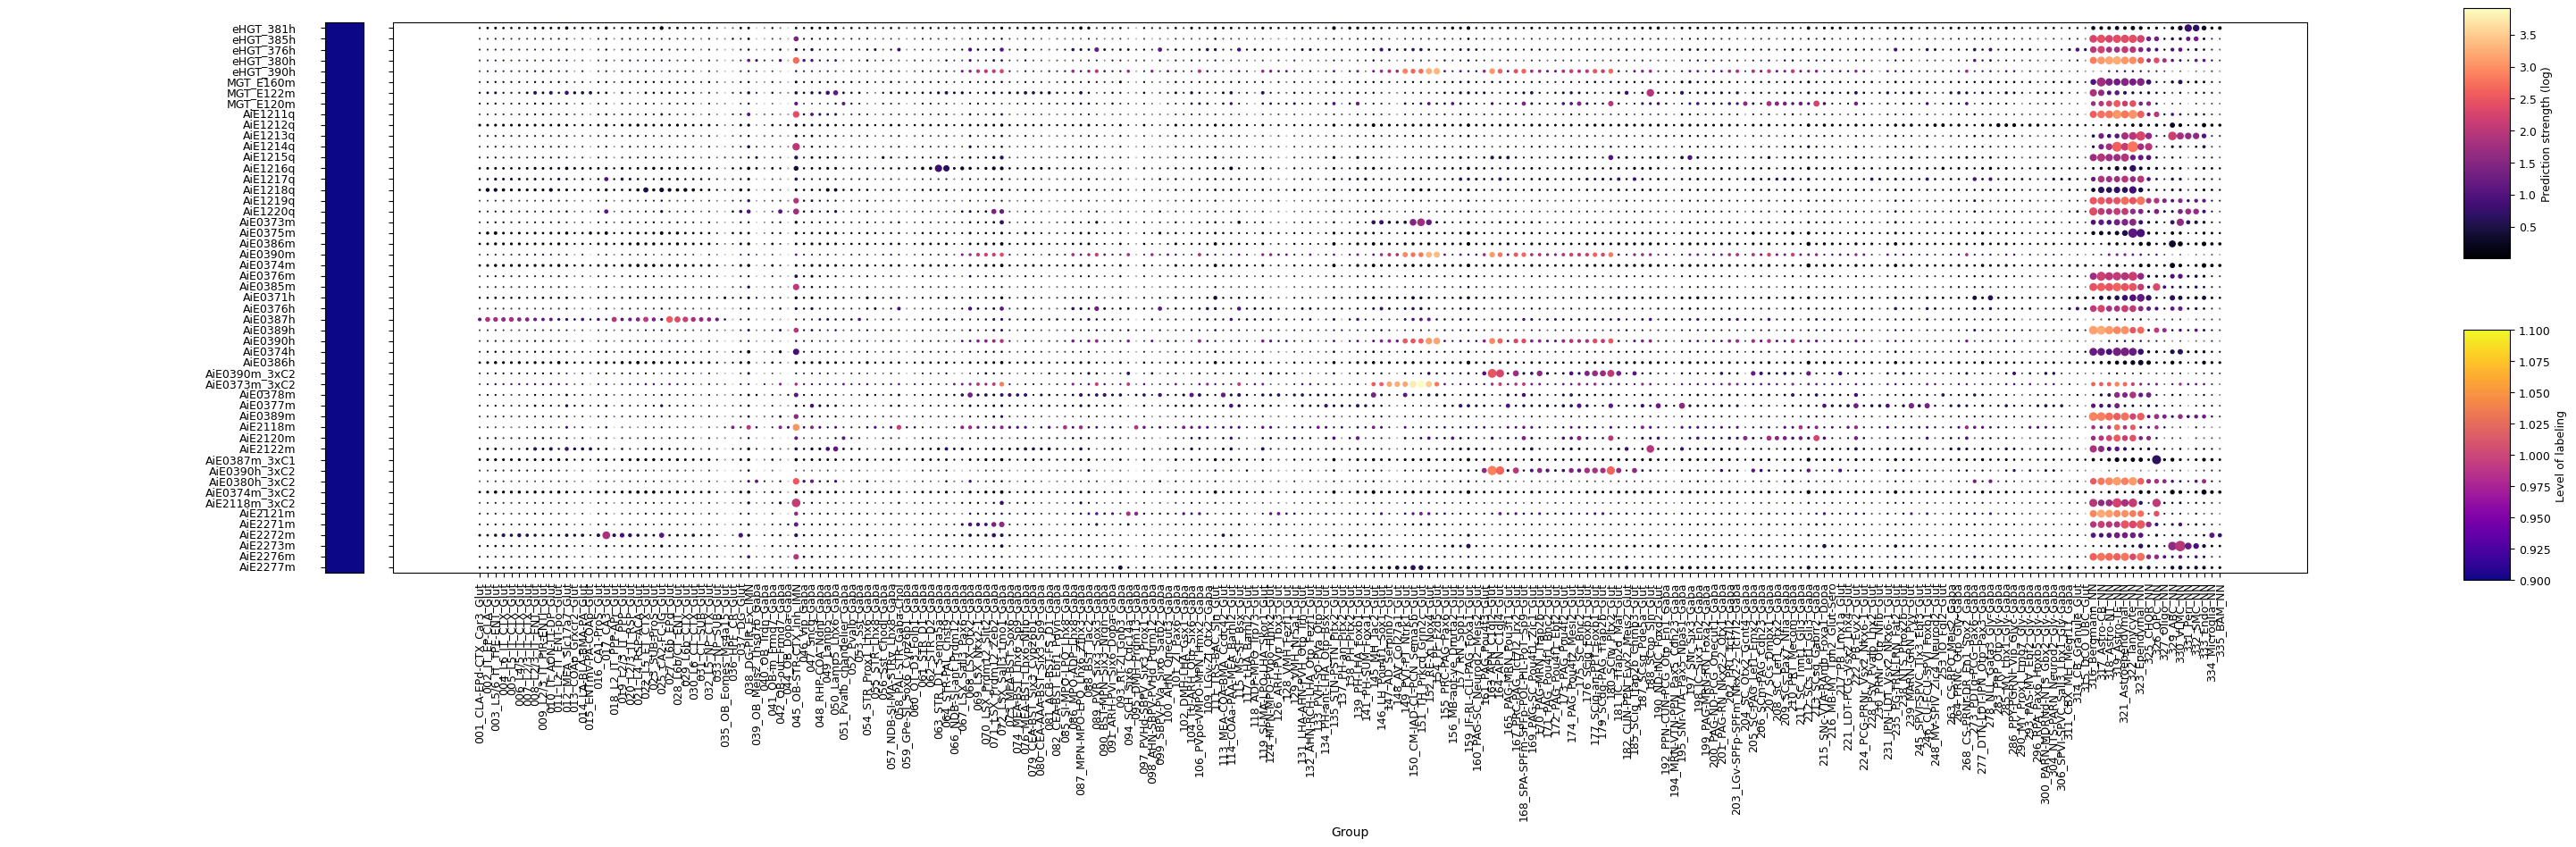

In [14]:
prediction_specificity = crested.pp._utils._calc_proportion(crested.tl.predict(df["Sequence"].tolist(), model_wmb, batch_size=8))
prediction_strength = np.log1p(crested.tl.predict(df["Sequence"].tolist(), model_wmb, batch_size=8))

plot_prediction_scatter_grid(prediction_strength, prediction_specificity, df, output_names_wmb, figsize=(35,8))

## Check specific regions

In [15]:
import numpy as np

enh='AiE1214q'

idx = np.argwhere(df.index==enh)[0,0]
seq = df.iloc[idx]['Sequence']
id_ = df.index[idx]
len_ = np.sum(np.array(list(seq)) != "N")
print(id_)
print(len_)

AiE1214q
500


In [16]:
# only for human regions

import os
import pyBigWig
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# === Predefined BigWig folders ===
species_folders = {
    #"Mouse": "/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/OCTO/aibs-octo-dnaseq-modeling/spinal_cord/data/mouse/bigwig/",
    #"Macaque": "/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/OCTO/aibs-octo-dnaseq-modeling/spinal_cord/data/macaque/bigwig/",
    "Human": "/allen/programs/celltypes/workgroups/rnaseqanalysis/HMBA/Aim1_Atlases/BasalGanglia_paper_package/data/human/ATAC/Astro_subGroup/results/"
}

adatas = {
    #"Mouse": adata_mouse,
    #"Macaque": adata_macaque,
    "Human": adata
}

# Load and clean coordinate table
df["Core_Coordinates"] = df["Core_Coordinates"].str.replace(",", "")

# === Parse coordinate ===
row = df.iloc[idx]
species = row["Species"]
coord_str = row["Core_Coordinates"]

adata_ = adatas[species]
#norm_vals = adata_.obsm['weights']
clss = np.array(adata_.obs_names)

def parse_coord(coord_str):
    chrom, rest = coord_str.split(":")
    start, end = map(int, rest.split("-"))
    return chrom, start, end

chrom, start, end = parse_coord(coord_str)

if species == 'Macaque':
    chrom = macaque_chrom_map[chrom]

# === Get folder and files ===
if species not in species_folders:
    raise ValueError(f"Species '{species}' not recognized")

bw_folder = species_folders[species]
bw_files = sorted(f for f in os.listdir(bw_folder) if f.endswith((".bw", ".bigWig")))

# === Collect values ===
values = []
labels = []

for cls in clss:
    cls = cls+'.bw'
    bw_path = os.path.join(bw_folder, cls)
    try:
        bw = pyBigWig.open(bw_path)
        signal = bw.values(chrom, start, end, numpy=True)
        total_signal = float("nan") if signal is None else np.nansum(signal)
    except RuntimeError:
        total_signal = float("nan")
    finally:
        bw.close()
    values.append(total_signal)
    labels.append(cls[:-3])

values = np.array(values)#crested.pp._utils._calc_proportion(np.array(values))
# === Plot ===
plt.figure(figsize=(15, 3.5))
plt.bar(labels, values)
plt.title(f"{df.index[idx]} ({species}) — {chrom}:{start}-{end}")
plt.ylabel("Peak height")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

KeyError: 'Macaque'

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step


2025-08-05 14:20:12.400231: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 134.09GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


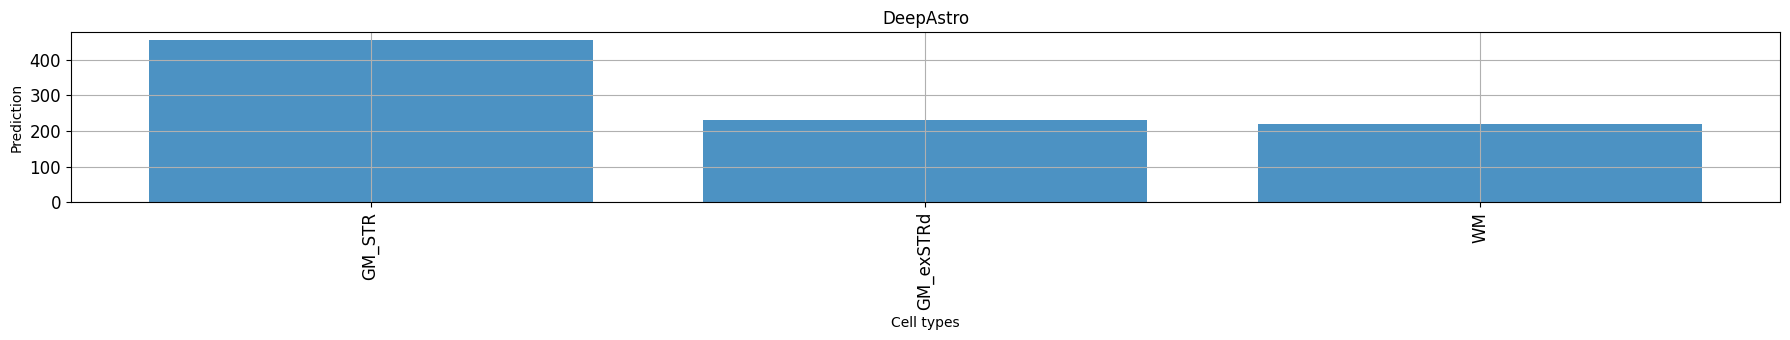

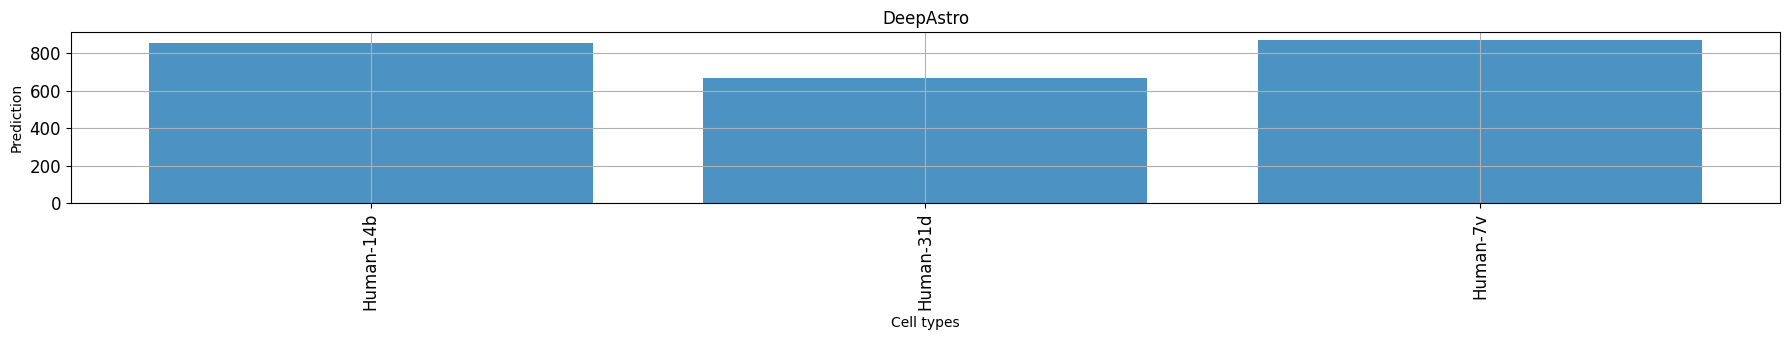

/home/niklas.kempynck/miniconda3/envs/crested_testing/lib/python3.10/site-packages/crested/pl/_utils.py:95: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout()


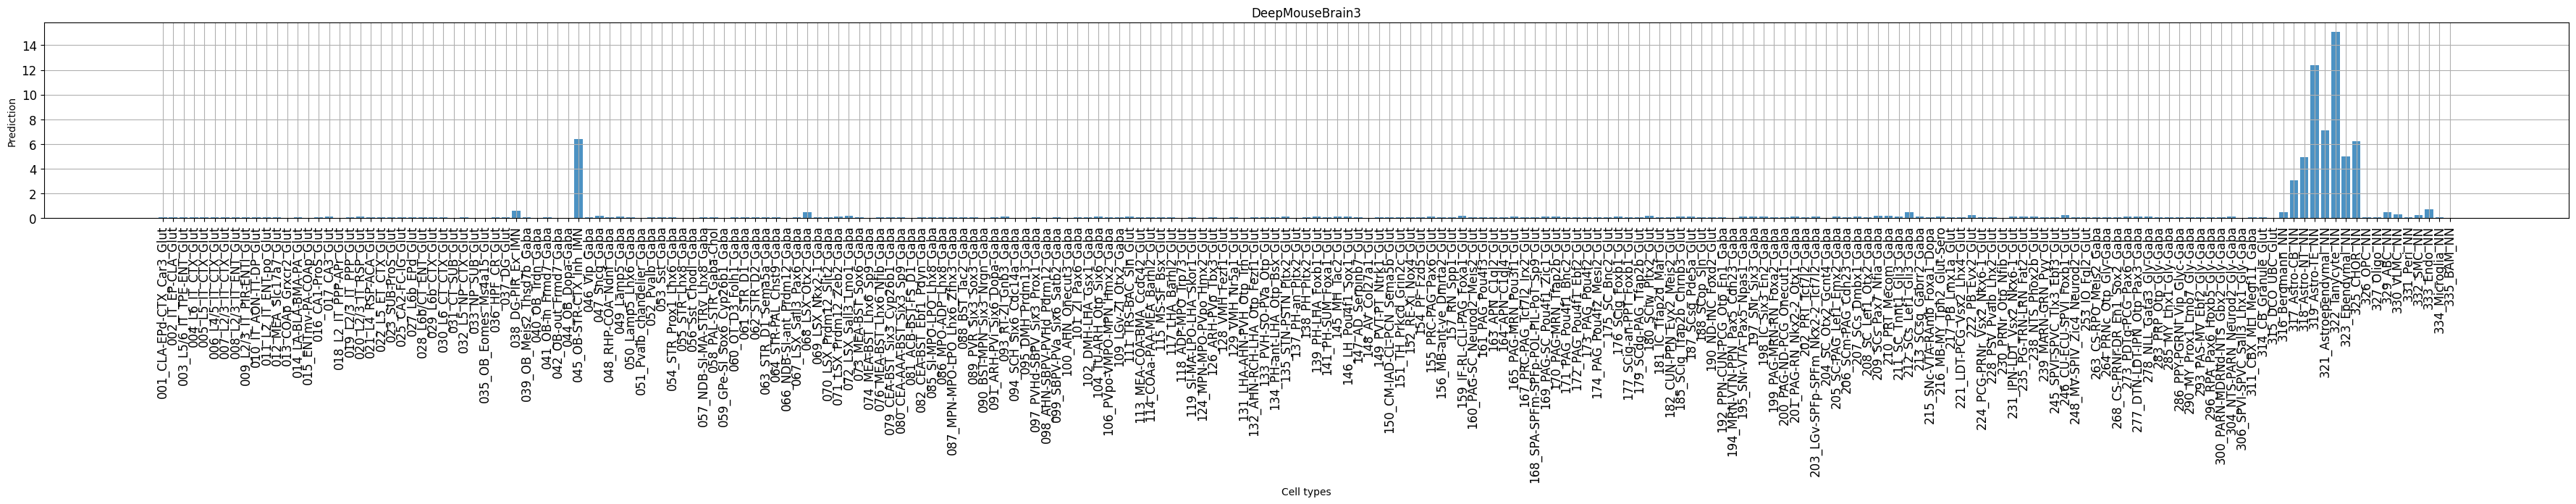

In [17]:
prediction_astro = crested.tl.predict(seq, model)
prediction_dv = crested.tl.predict(seq, model_dv)
prediction_wmb = crested.tl.predict(seq, model_wmb)

crested.pl.bar.prediction(prediction_astro, classes=list(adata.obs_names), x_label_rotation=90, height=3.5, title='DeepAstro')
crested.pl.bar.prediction(prediction_dv, ['Human-14b', 'Human-31d', 'Human-7v'], x_label_rotation=90, height=3.5, title='DeepAstro')
crested.pl.bar.prediction(prediction_wmb, classes=output_names_wmb, x_label_rotation=90, height=3.5, title='DeepMouseBrain3', width=45)

In [18]:
classes_of_interest = list(adata.obs_names)
class_idx = list(adata.obs_names.get_indexer(classes_of_interest))

regions_of_interest=[seq]
scores, one_hot_encoded_sequences = crested.tl.contribution_scores(
    regions_of_interest,
    target_idx=class_idx,
    model=model_dv,
    method='integrated_grad'
)



2025-08-05T14:20:15.284802-0700 INFO Calculating contribution scores for 3 class(es) and 1 region(s).


Model: 100%|██████████| 1/1 [00:08<00:00,  8.32s/it]


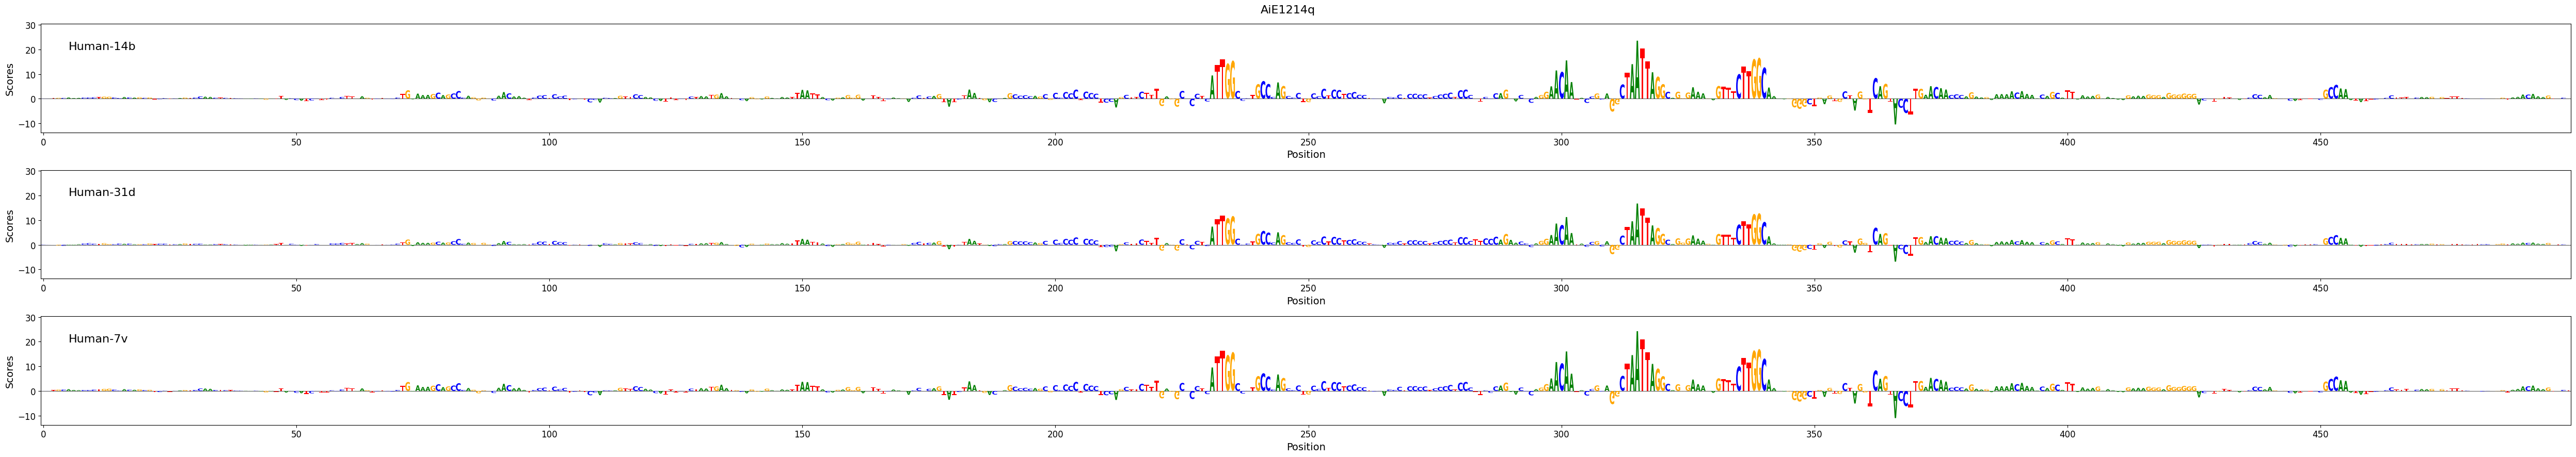

In [19]:
%matplotlib inline
crested.pl.patterns.contribution_scores(
    scores,
    one_hot_encoded_sequences,
    sequence_labels=[""],
    class_labels=['Human-14b', 'Human-31d', 'Human-7v'],#list(adata.obs_names),
    zoom_n_bases=int(len_/1),
    title=id_,
    height=3*3,#2.3*3,
)  # zoom in on the center 500bp

In [20]:
class_idx_wmb = list(np.flip(np.argsort(prediction_wmb[0]))[:3])

regions_of_interest=[seq]
scores_wmb, one_hot_encoded_sequences = crested.tl.contribution_scores(
    regions_of_interest,
    target_idx=class_idx_wmb,
    model=model_wmb,
    method='integrated_grad'
)

2025-08-05T14:20:32.229160-0700 INFO Calculating contribution scores for 3 class(es) and 1 region(s).


Model: 100%|██████████| 1/1 [00:29<00:00, 29.33s/it]


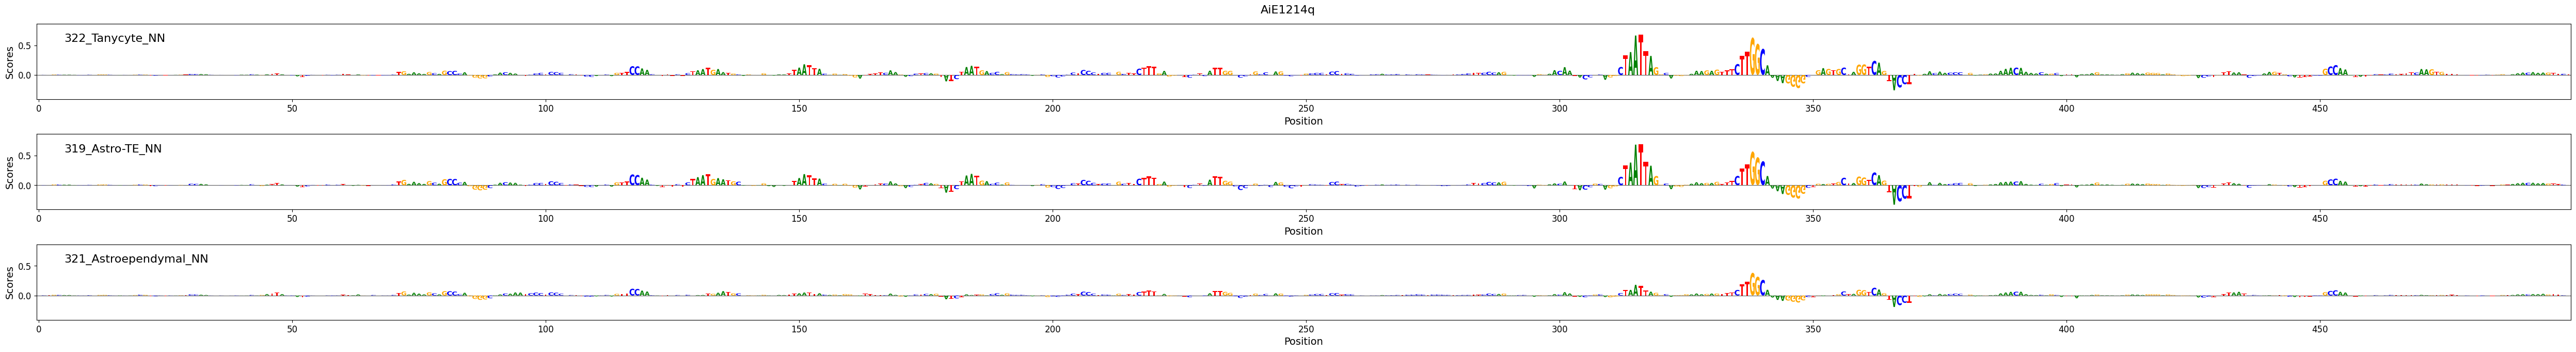

In [21]:
%matplotlib inline
crested.pl.patterns.contribution_scores(
    scores_wmb,
    one_hot_encoded_sequences,
    sequence_labels=[""],
    class_labels=list(np.array(output_names_wmb)[class_idx_wmb]),
    zoom_n_bases=int(len_/1),
    title=id_,
    height=2.3*3
)  # zoom in on the center 500bp

# Manual checks

In [22]:
import pysam
chrom = "chr17"  #'chr18'
start = 72335965-807
end = 72336465+807

chrom="

genome=pysam.FastaFile(genome_human)
sequence = genome.fetch(chrom, start, end)

prediction = crested.tl.predict(sequence, model)
prediction_dv = crested.tl.predict(sequence, model_dv)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


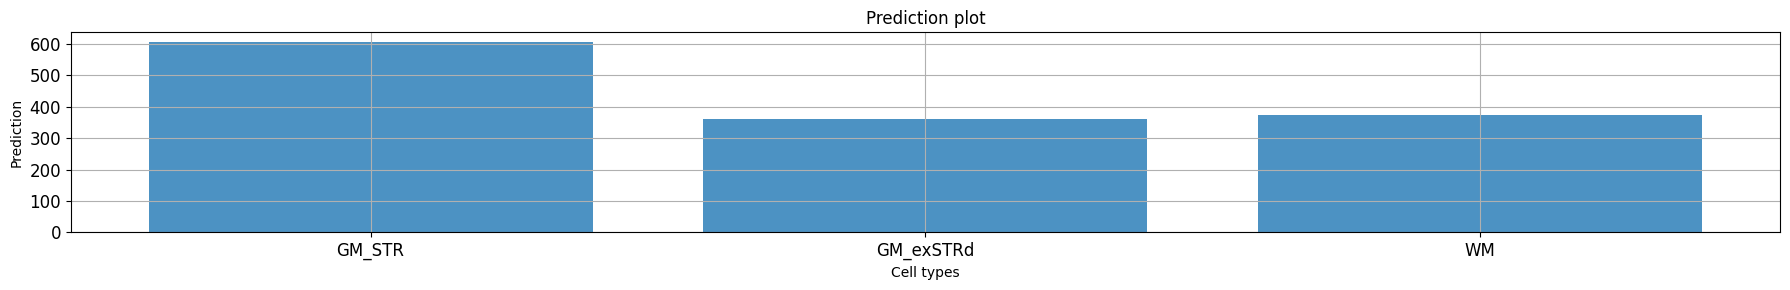

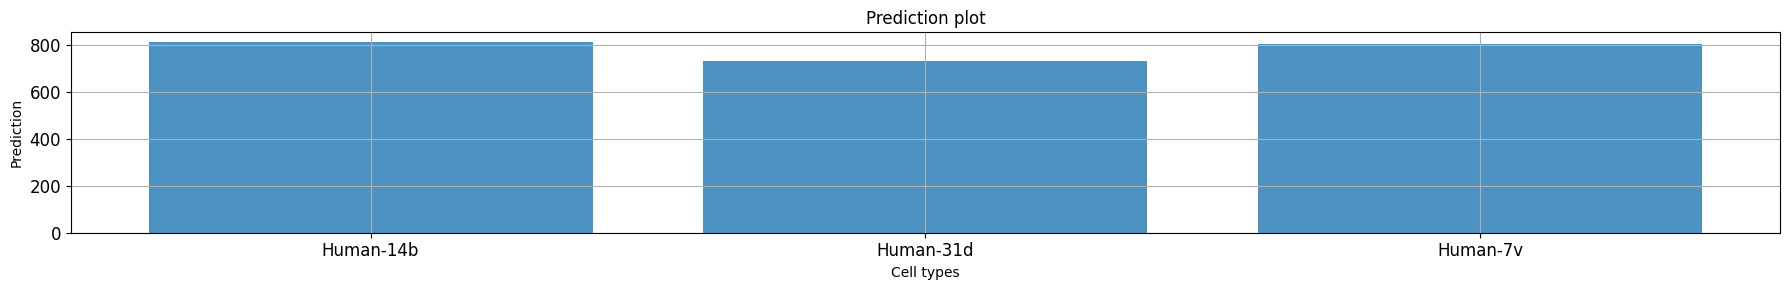

In [23]:
crested.pl.bar.prediction(prediction, classes=list(adata.obs_names))
crested.pl.bar.prediction(prediction_dv, classes=['Human-14b', 'Human-31d', 'Human-7v'])

In [28]:
classes_of_interest = list(adata.obs_names)
class_idx = list(adata.obs_names.get_indexer(classes_of_interest))

regions_of_interest=[sequence]
scores, one_hot_encoded_sequences = crested.tl.contribution_scores(
    regions_of_interest,
    target_idx=class_idx,
    model=model,
    method='integrated_grad'
)



2025-08-05T14:22:29.549855-0700 INFO Calculating contribution scores for 3 class(es) and 1 region(s).


Model: 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]


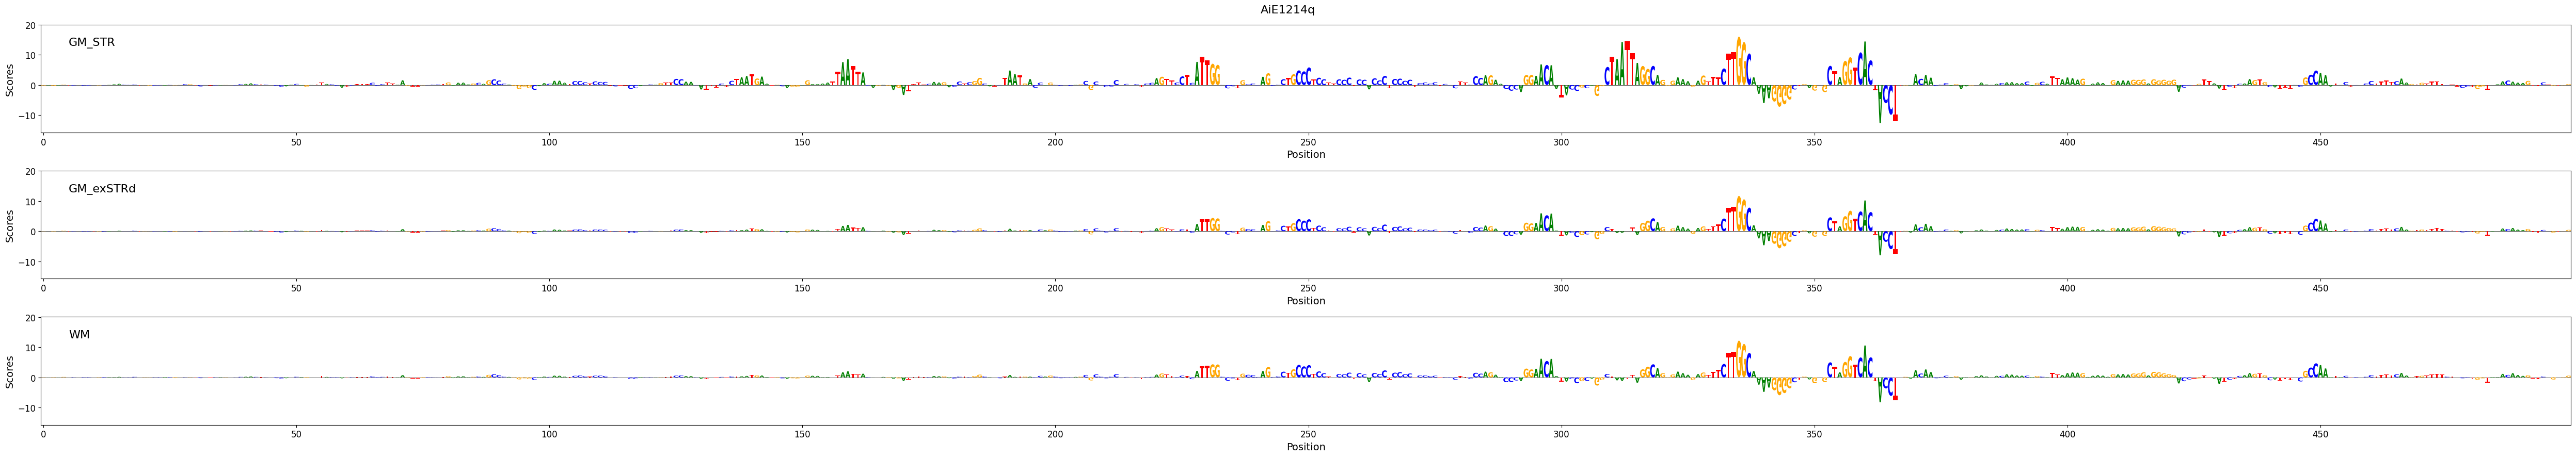

In [29]:
%matplotlib inline
len_=500
crested.pl.patterns.contribution_scores(
    scores,
    one_hot_encoded_sequences,
    sequence_labels=[""],
    class_labels=list(adata.obs_names),
    zoom_n_bases=int(len_/1),
    title=id_,
    height=3*3,#2.3*3,
)  # zoom in on the center 500bp

In [30]:
classes_of_interest = list(adata.obs_names)
class_idx = list(adata.obs_names.get_indexer(classes_of_interest))

regions_of_interest=[sequence]
scores, one_hot_encoded_sequences = crested.tl.contribution_scores(
    regions_of_interest,
    target_idx=class_idx,
    model=model_dv,
    method='integrated_grad'
)



2025-08-05T14:23:17.709460-0700 INFO Calculating contribution scores for 3 class(es) and 1 region(s).


Model: 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]


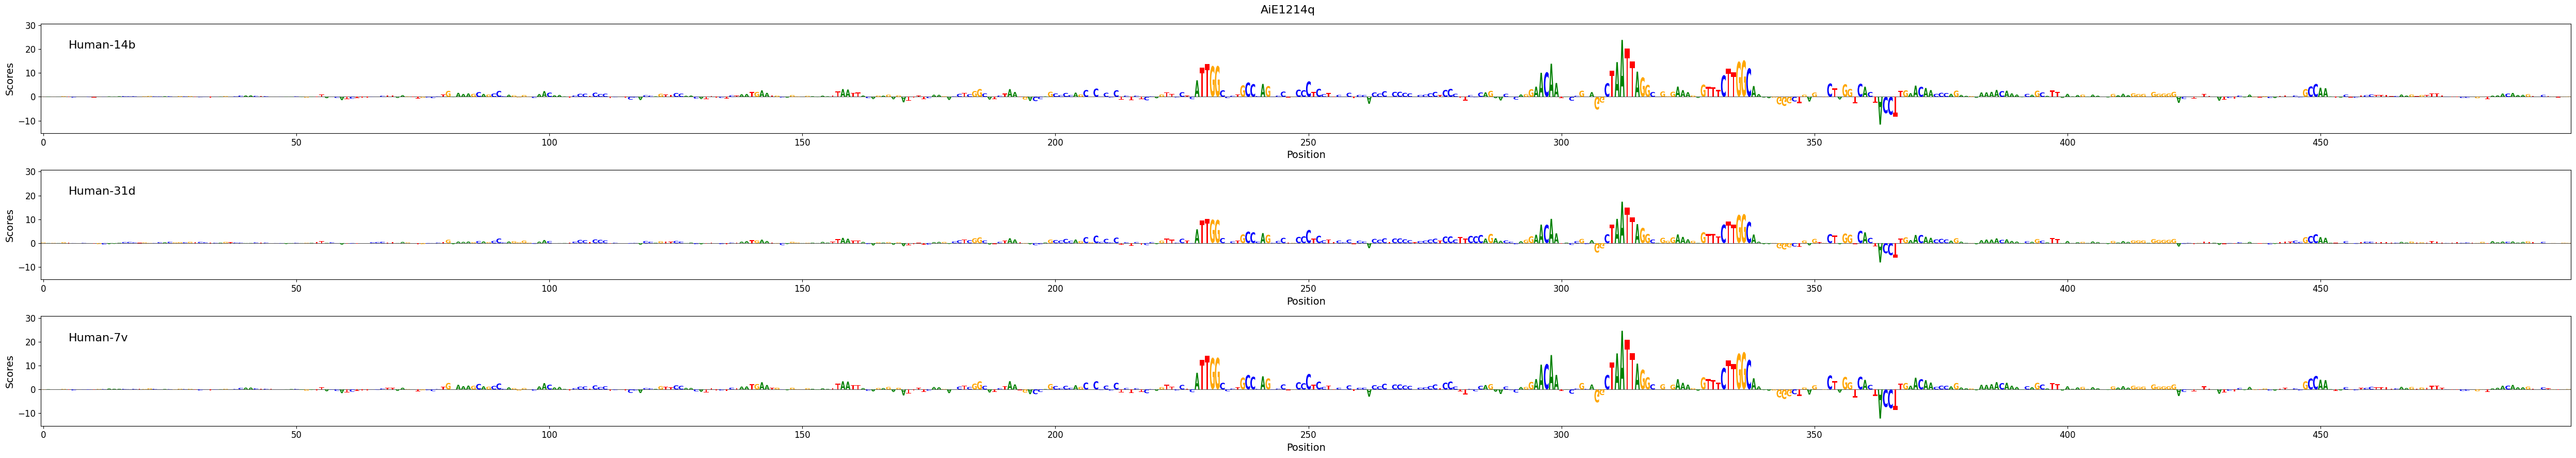

In [31]:
%matplotlib inline
len_=500
crested.pl.patterns.contribution_scores(
    scores,
    one_hot_encoded_sequences,
    sequence_labels=[""],
    class_labels=['Human-14b', 'Human-31d', 'Human-7v'],#list(adata.obs_names),
    zoom_n_bases=int(len_/1),
    title=id_,
    height=3*3,#2.3*3,
)  # zoom in on the center 500bp